In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import os

file_name = "ballscrew_s.xlsx"
absolute_path = os.path.abspath(file_name)

print(absolute_path)

C:\Users\Sanam\git\Thesis_ErrorDetection\ballscrew_s.xlsx


In [3]:
# Load your data from the Excel files
data_b = pd.read_excel('ballscrew_s.xlsx')
data_l = pd.read_excel('leadscrew_s.xlsx')

In [4]:
data_b

,commanded position,theoretical position,actual position,error
0,-8.29651,-8.300,-8.33803,0.04152
1,5.22037,5.225,5.20102,-0.01935
2,-1.29420,-1.300,-1.31474,0.02054
3,-3.22897,-3.225,-3.22500,-0.00397
4,7.83200,7.825,7.82485,-0.00715
...,...,...,...,...
14995,8.38472,8.375,8.37735,-0.00737
14996,5.06854,5.075,5.06841,-0.00013
14997,-8.47306,-8.475,-8.47500,0.00194
14998,7.75047,7.750,7.78305,0.03258


In [5]:
# Extract the features (X) and target (Y) for ballscrew
X_b = data_b.iloc[:, :-1].values  # Use all columns except the last one as features
Y_b = data_b.iloc[:, -1].values  # Use the last column as the target

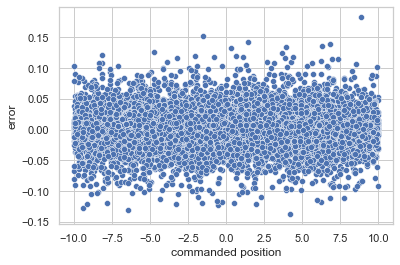

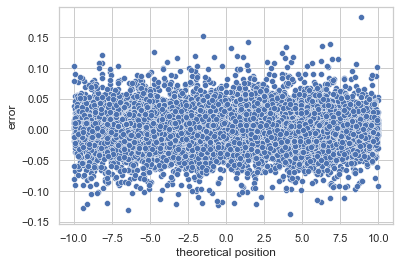

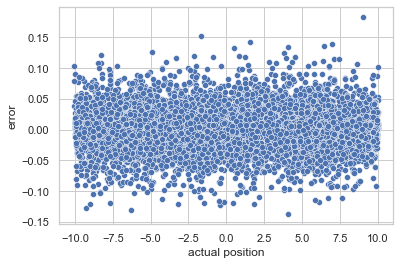

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_b['commanded position'], y=data_b['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_b['theoretical position'], y=data_b['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_b['actual position'], y=data_b['error'])
plt.show()


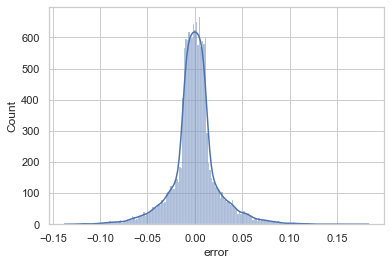

In [7]:
#Histogram
sns.histplot(data_b['error'], kde=True)
plt.show()

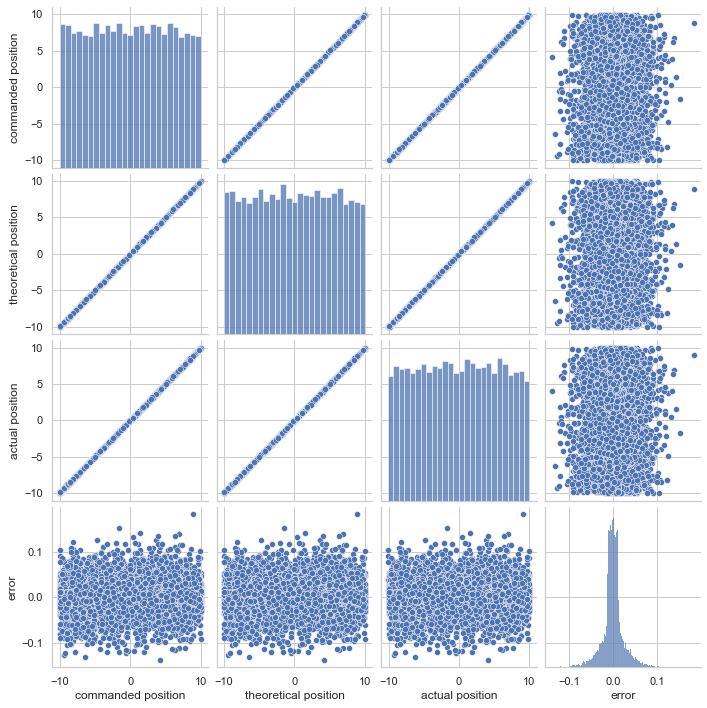

In [8]:
# Seaborn Pair Plot
sns.pairplot(data_b)
plt.show()

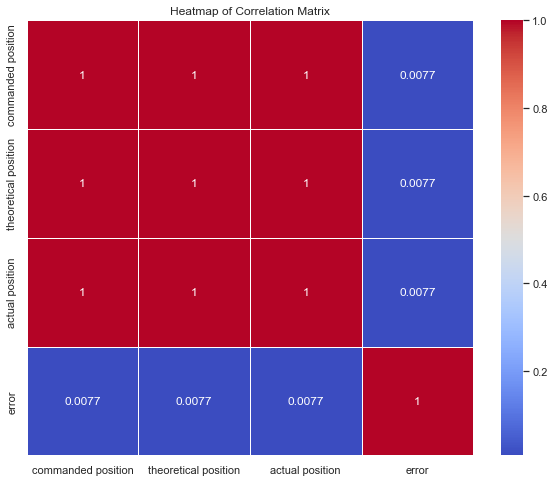

In [9]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_b.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [10]:
# Normalize the data
scaler_X_b = MinMaxScaler()
scaler_Y_b = MinMaxScaler()
X_b = scaler_X_b.fit_transform(X_b)
Y_b = scaler_Y_b.fit_transform(Y_b.reshape(-1, 1))

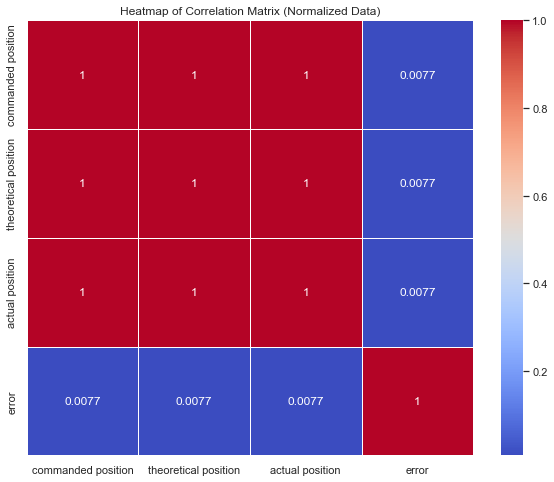

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (Note that we are not normalizing the target variable 'error')
data_b_normalized = pd.DataFrame(scaler.fit_transform(data_b.iloc[:, :-1]), columns=data_b.columns[:-1])

# Add the target variable 'error' back into the DataFrame
data_b_normalized['error'] = data_b['error'].values

# Now let's visualize the normalized data with a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix_normalized = data_b_normalized.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Normalized Data)')
plt.show()


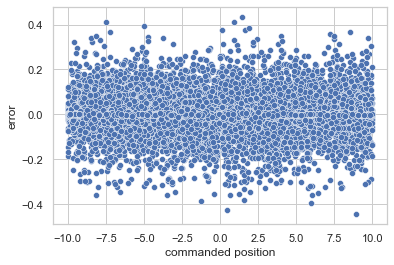

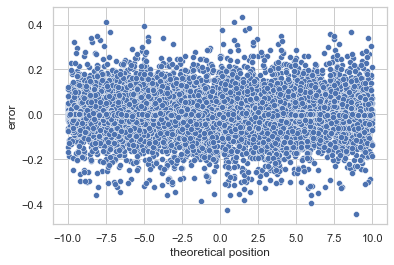

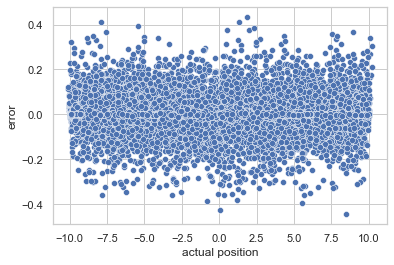

In [12]:
# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_l['commanded position'], y=data_l['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_l['theoretical position'], y=data_l['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_l['actual position'], y=data_l['error'])
plt.show()


In [13]:
# Split data into training and testing sets
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_b, Y_b, test_size=0.2, random_state=42)

In [14]:
# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

In [15]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model.fit(X_train_b, Y_train_b, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
375/375 [==============================] - 2s 2ms/step - loss: 0.0087
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 5/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 7/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 8/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 9/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 10/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 11/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 12/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 13/200


In [ ]:
# Evaluate the model
MSE_train_b = np.mean(np.square(model.predict(X_train_b) - Y_train_b))
MSE_test_b = np.mean(np.square(model.predict(X_test_b) - Y_test_b))
print('MSE on training data:', MSE_train_b)
print('MSE on testing data:', MSE_test_b)

In [ ]:
data_l

In [ ]:
# Extract the features (X) and target (Y)
X_l = data_l.iloc[:, :-1].values
Y_l = data_l.iloc[:, -1].values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_l['commanded position'], y=data_l['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_l['theoretical position'], y=data_l['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_l['actual position'], y=data_l['error'])
plt.show()


In [ ]:
#Histogram
sns.histplot(data_l['error'], kde=True)
plt.show()

In [ ]:
# Seaborn Pair Plot
sns.pairplot(data_l)
plt.show()

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_l.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
# Normalize the data
scaler_X_l = MinMaxScaler()
scaler_Y_l = MinMaxScaler()
X_l = scaler_X_l.fit_transform(X_l)
Y_l = scaler_Y_l.fit_transform(Y_l.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (Note that we are not normalizing the target variable 'error')
data_b_normalized = pd.DataFrame(scaler.fit_transform(data_b.iloc[:, :-1]), columns=data_b.columns[:-1])

# Add the target variable 'error' back into the DataFrame
data_b_normalized['error'] = data_b['error'].values

# Now let's visualize the normalized data with a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix_normalized = data_b_normalized.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Normalized Data)')
plt.show()


In [ ]:
# Scatter Plot for each feature against the target on normalized data
for feature in features:
    sns.scatterplot(data=data_b_normalized, x=feature, y=target)
    plt.title(f'Scatter Plot of {feature} vs {target} (Normalized Data)')
    plt.show()

# Pair Plot on normalized data
sns.pairplot(data_b_normalized)
plt.show()

In [ ]:
# Split data into training and testing sets
X_train_l, X_test_l, Y_train_l, Y_test_l = train_test_split(X_l, Y_l, test_size=0.2, random_state=42)

In [ ]:
# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_l.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model.fit(X_train_l, Y_train_l, epochs=100, batch_size=32, verbose=1)

In [ ]:
# Evaluate the model
MSE_train_l = np.mean(np.square(model.predict(X_train_l) - Y_train_l))
MSE_test_l = np.mean(np.square(model.predict(X_test_l) - Y_test_l))
print('MSE on training data:', MSE_train_l)
print('MSE on testing data:', MSE_test_l)